# Chapter 3. 신경망

|퍼셉트론|좋은소식|나쁜소식|
|-|-|-|
||복잡한 함수도 다층 퍼셉트론으로 표현할 수 있다.|가중치를 직접 설정해줘야 한다.|

가중치를 직접 설정해줘야 하는 번거로움을 신경망으로 해결할 수 있다. 신경망은 입력층, 은닉층, 출력층으로 구성된다. 여기서 은닉층은 사람의 눈에는 보이지 않는다. 실제로 뉴런이 연결되는 방식은 퍼셉트론과 달라진 것이 없다. 

## 활성화 함수
퍼셉트론과 신경망의 가장 다른 점 중 하나는 활성화 함수일 것이다. 입력값에 가중치 w가 곱해지고, 편향 b가 더해지는 식의 변천 과정을 통해 활성화 함수를 들여다 보면,
1. y = b + x1w1 + x2w2: 이 값이 0을 넘으면 1을 출력, 넘지 않으면 0을 출력한다.
2. 위 식을 다시 함수로 적으면, y = h(b + x1w1 +x2w2)이고, 함수 h(x)는 x, 즉 여기서는 b + x1w1 + x2w2가 0을 넘으면 1을, 그렇지 않으면 0을 출력한다. 이는 1번과 같다.
3. 여기서 h(x) 함수를 활성화 함수라고 한다. 활성화 함수는 **입력 신호의 총합을 출력 신호로 변환하는 함수**이다. 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다. 지금까지의 식은 두가지 역할로 나눌 수 있다. 
  * 가중치가 곱해진 입력 신호의 총합을 계산하고,
  * 그 합을 활성화 함수에 입력해 결과를 내는.

이걸 식으로 만들어보면, a = b + x1w1 + x2w2, y = h(a)가 된다. 그림으로 보면 훨씬 이해가 잘됨. 밑바닥부터 시작하는 딥러닝 66페이지 참고할 것.

### 계단함수

In [42]:
# 계단함수 구현하기
# 계단함수는 퍼셉트론에서 사용. 즉 신경망과 퍼셉트론의 차이는 활성화 함수를 뭘 쓰냐의 차이일 수도?

def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

위 함수는 간단하지만 문제가 있음. 인수 x가 실수만 받을 수 있다는 것인데, 예를 들어 step_function(3.0)은 되지만 step_function(np.array([1.0, 2.0]))과 같은 넘파이 배열을 인수로 받을 수는 없다. 이걸 해결하기 위해 다음과 같이 수정할 수 있다.

In [43]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [44]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [45]:
y = x > 0
y

array([False,  True,  True])

numpy에 부등호 연산을 하면 각각의 원소가 조건에 맞게 bool 결과가 생기고, 이 결과가 배열로 생성된다.  여기서 y가 bool 배열이다. 하지만 계단함수는 int, 즉 0이나 1을 출력하므로 배열 y의 결과를 int형으로 바꿔준다(astype)

In [46]:
y = y.astype(np.int)
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([0, 1, 1])

넘파이 자료형을 변환할 땐 astype() 메서드를 이용한다. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


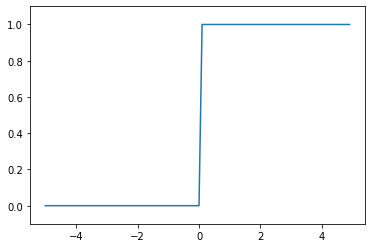

In [47]:
# 계단함수의 그래프
import matplotlib.pyplot as plt
import numpy as np
def step_function(x):
  return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0 전까지 0.1 간격의 넘파이 배열을 생성한다. [-5.0, -4.9, -4.8, ... , 4.9]
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 시그모이드 함수

In [48]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [49]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

* 브로드캐스트
  * 위 함수가 넘파이 배열도 잘 처리할 수 있는 이유는 넘파이의 브로드캐스트에 있다. 
  * 넘파이에서는 형상이 다른 배열끼리도 계산할 수 있다. 
  * 예를 들어 2X2 행렬 A에 스칼라값 10을 곱하면, 10이라는 스칼라값이 2X2 행렬로 확대된 후 연산이 이루어진다. 이 기능을 브로드캐스트(broadcast)라고 한다.

> 스칼라값이란?<br>하나의 숫자로만 표시되는 양. 즉 단지 크기만 있는 물리량이다. 벡터, 텐서 등이 방향과 크기가 있는 물리량인데 비해 **방향의 구별이 없는 수량이다.** 예를 들어 스칼라값은 |-1|, |2|등으로 표기되는 **절대값**이고, 벡터는 +3, -4, +2 등 방향까지 포함된 값으로 볼 수 있다.<br>출처:https://ko.wikipedia.org/wiki/%EC%8A%A4%EC%B9%BC%EB%9D%BC_(%EB%AC%BC%EB%A6%AC)

즉, 브로드캐스트 기능이란 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것이다.

In [50]:
# 브로드캐스트 예시
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [51]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

임의의 스칼라값과 넘파이 배열의 각 원소의 연산이 이루어지는 것을 확인할 수 있다. 앞서 구현한 sigmoid 함수에서도 np.exp(-x)가 넘파이 배열을 반환하기 때문에, 1 / (1 + np.exp(-x))도 넘파이 각 원소에 연산한 결과를 반환한다.

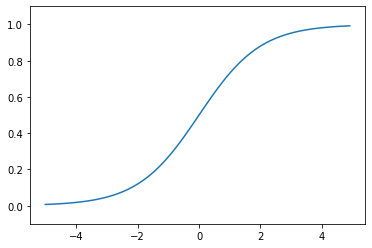

In [52]:
# 시그모이드 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU 함수
최근에 많이 쓰이는 함수. Rectified Linear Unit, 즉 ReLU 함수는 입력이 0을 넘으면 입력을 그대로 출력하고, 0 이하면 0을 출력한다. 

ReLU에서 Rectified란 '정류된'이란 뜻이다. 전기회로 쪽 용어인데, 예를 들어 반파정류회로(Half-Wave Rectified Circuit)는 +/- 가 반복되는 교류에서 -흐름을 차단하는 회로이다. 이 개념으로 ReLU 함수를 보면 0이하의 값을 차단해 0을 출력하는 것과 같은 류의 느낌인 것 같다. 

In [53]:
import numpy as np
def relu(x):
  return np.maximum(0, x)

In [54]:
relu(-1)

0

In [55]:
relu(1)

1

In [56]:
relu(10)

10

In [57]:
relu(-10)

0

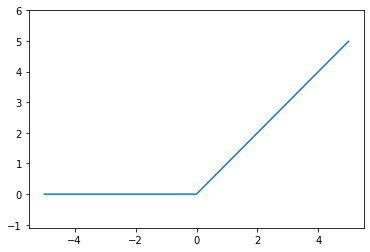

In [58]:
# ReLU 그래프
import matplotlib.pyplot as plt
x = np.arange(-5.0, 5.0, 0.01)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 6.0) # y축 범위
plt.show()

## 다차원 배열의 계산
넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다. 
* 다차원 배열
  * 다차원 배열도 그 기본은 숫자의 집합이다. 
  * 숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것, 3차원으로 늘어놓은 것이나 (더 일반화한) N차원으로 나열하는 것을 통틀어 다차원 배열이라고 한다. 

In [59]:
# 넘파이를 이용한 다차원 배열 작성
# 일단 1차원
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [60]:
# 배열의 차원수
np.ndim(A)

1

In [61]:
# 배열의 형상
A.shape

(4,)

In [62]:
A.shape[0]

4

In [63]:
# 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [64]:
np.ndim(B)

2

In [65]:
B.shape

(3, 2)

B는 3X2 배열이다. 처음 차원에는 원소 3개, 그 다음 차원에는 각각 원소가 2개 있다는 뜻임. 2차원 배열은 특히 행렬이라고 부른다. 

### 행렬의 곱
행렬 곱은 왼쪽 행렬의 행과 오른쪽 행렬의 열을 원소별로 곱하고 그 값들을 더해서 계산한다. 그 계산 결과가 새로운 다차원 배열의 원소가 된다. 

In [66]:
# 행렬의 곱
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [67]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [68]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

위에서는 2X2 행렬의 곱이고, 다른 형상의 행렬의 곱도 계산할 수 있는데, 행렬의 형상에 주의해야 한다. **첫번째 행렬의 첫번째 차원의 원소 수(열 수)와 두번째 행렬의 0번째 차원의 원소 수(행 수)가 같아야한다.** 2X3과 3X2의 곱은 가능하지만 2X3, 2X2행렬은 안됨.

In [69]:
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [70]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [71]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [72]:
# 행렬 곱이 안되는 경우
C = np.array([[1,2], [3,4]])
C.shape

(2, 2)

In [73]:
np.dot(A, C)

ValueError: ignored

### 신경망에서의 행렬 곱

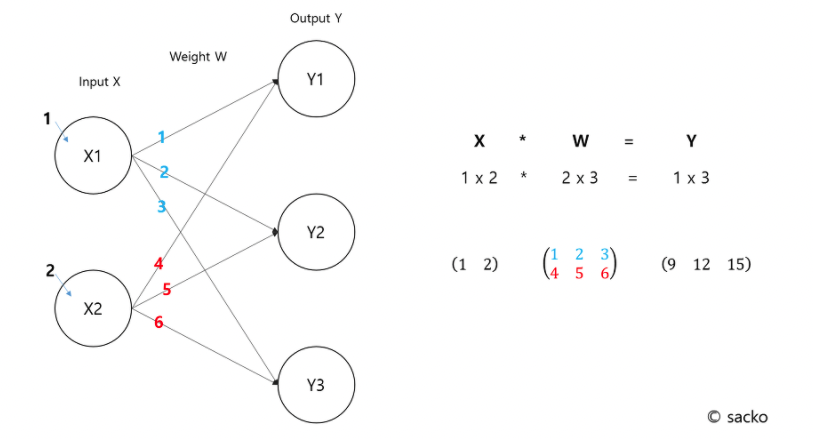

출처:https://yeowool0217.tistory.com/503

In [74]:
# 구현
# X, W, Y의 형상을 주의해서 볼 것
# 특히 X와 W의 대응하는 차원의 원소 수가 같아야 한다!
X = np.array([1, 2])
X.shape

(2,)

In [75]:
W = np.array([[1,2,3], [4,5,6]])
W.shape

(2, 3)

In [76]:
Y = np.dot(X, W)
print(Y)

[ 9 12 15]


In [77]:
W = np.array([[1,3,5], [2,4,6]])

In [78]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3층 신경망 구현하기
핵심은 신경망에서의 계산을 행렬 계산으로 정리할 수 있다는 것이다. 자세한 내용은 책 83~85 페이지를 참고하자.

In [79]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [80]:
# 활성화 함수(여기서는 시그모이드) 추가
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


지금까지는 입력층인 0층에서 바로 다음 은닉층인 1층으로 넘어가는 과정이고, 이번엔 1층에서 2층으로 넘어가는 과정을 구현해보자

In [81]:
# 1층에서 2층으로 가는 과정
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [82]:
print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


1층의 출력인 Z1이 2층의 입력이 되는 것에 유의하자. 

마지막으로 2층에서 출력층으로의 신호 전달을 구현해보자. 단, 출력층에서 사용하는 활성화 함수가 다른 것을 참고할 것!

In [84]:
# 항등함수인 identity_function() 정의, 입력을 그대로 출력하는 함수
# 이를 출력층의 활성화 함수로 이용

def identity_function(x):
  return X

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

[1.  0.5]


출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다. 예를 들어 회귀에는 항등함수, 2클래스 분류에는 시그모이드, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다. 

### 구현 정리
지금까지 구현을 정리해보자. 신경망 구현의 관례에 따라 가중치만 W1과 같이 대문자로 쓰고, 그 외 편향과 중간 결과 등은 모두 소문자로 쓴다.

In [87]:
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def identity_function(x):
    return x

In [88]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


* init_network
  * 가중치와 편향을 초기화
  * 이들을 딕셔너리 변수인 network에 저장한다.
  * 이 딕셔너리 변수 network에는 각 층에 필요한 매개변수(가중치, 편향)을 저장

* forward()
  * 입력 신호를 출력으로 변환하는 처리 과정을 구현

forward라는 이름의 이유는 순전파(입력에서 출력 방향)라는 것을 알리기 위함임.

> 기계학습 문제는 분류(Classification)와 회귀(Regression)로 나뉜다. 분류는 데이터가 어느 클래스에 속하는지를 구분하는 문제, 회귀는 입력 데이터에서 수치를 예측하는 문제이다.

> 회귀<br>회귀라는 이름의 기원은 19세기 후반 영국의 우생학자 프랜시스 골턴 경이 사람과 완두콩 등을 대상으로 그 키를 측정했다. 관찰 결과 키가 큰 부모의 자식은 부모보다 작고 작은 부모의 자식은 부모보다 큰, 즉 평균으로 회귀(Regression)하는 경향이 있음을 알았다. 그 사이에는 선형 관계가 있어 부모의 키로부터 자식의 키를 예측할 수 있고, 그 예측 결괏값이 연속적인 수치인 것이다.

### 항등 함수와 소프트맥스 함수 구현하기
* 항등 함수(identity function)
  * 입력을 그대로 출력한다. 입력과 출력이 항상 같다는 뜻임. 즉, 출력층에서 사용하면 입력 신호가 그대로 출력 신호가 된다. 

* 소프트맥스 함수(softmax function)

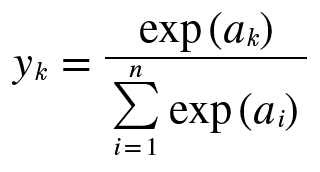

출처: https://kolikim.tistory.com/17

위 수식이 소프트맥스 함수의 식이다. 식에 대한 자세한 설명은 91페이지 참고.

In [89]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)     # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [91]:
sum_exp_a = np.sum(exp_a)     # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [92]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [93]:
# 소프트맥스 함수를 함수...?로 구현
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 소프트맥스 함수 구현 시 주의점
위에서 구현한 softmax() 함수의 코드는 식을 제대로 구현하고 있지만 컴퓨터로 계산할 땐 결함이 있다. 바로 **오버플로** 문제이다. 지수 함수 때문인데, 너무 큰 값이 되어버려서 수치가 불안정해진다. 
> 컴퓨터는 수를 4바이트나 8바이트와 같이 크기가 유한한 데이터로 다룬다. 즉, 표현할 수 있는 수의 범위가 한정되어 **너무 큰 값은 표현할 수가 없다.** 이를 오버플로라고 한다.

위 문제를 개선한 수식이 책 93페이지에 있음. 결국 포인트는,

**소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다는 것이다.**

In [94]:
# 개선한 식을 구현
# 꼭 책의 설명을 매번 보고 이해할 것

a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))   # 제대로 계산되지 않을 것, 오버플로 발생

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([nan, nan, nan])

In [95]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [96]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

입력 신호 중 최댓값을 빼주면 계산할 수 있다. 

In [99]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 소프트맥스 함수의 특징


In [100]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [101]:
np.sum(y)

1.0

위와 같이 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이다. 또 모든 출력의 총합은 1이다. 이는 중요한 성질인데, 이 성질 덕분에 소프트맥스의 출력을 확률로 계산할 수 있다. 